In [42]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [43]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [44]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [45]:
df_market=df_market_data.rename(columns={'price_change_percentage_24h': 'p_24h', 'price_change_percentage_7d': 'p_07d','price_change_percentage_14d': 'p_14d','price_change_percentage_30d': 'p_30d','price_change_percentage_60d': 'p_60d','price_change_percentage_200d': 'p_200d','price_change_percentage_1y': 'p_1y'})
df_market.head()

,p_24h,p_07d,p_14d,p_30d,p_60d,p_200d,p_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [46]:
# Plot your data to see what's in your DataFrame
df_market.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [47]:
df_market_scaled = StandardScaler().fit_transform(df_market[['p_24h', 'p_07d', 'p_14d','p_30d','p_60d', 'p_200d', 'p_1y']])

# Creating a DataFrame with with the scaled data
df_market_trans = pd.DataFrame(df_market_scaled, columns=['p_24h', 'p_07d', 'p_14d','p_30d', 'p_60d', 'p_200d', 'p_1y'])

# Set the coinid column as index

df_market_trans['coin_id']=df_market.index

df_market_trans.set_index('coin_id', inplace=True)

# Display sample data
df_market_trans.head()

,p_24h,p_07d,p_14d,p_30d,p_60d,p_200d,p_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [48]:
# Create a list with the number of k-values from 1 to 11
# Create an empty list to store the inertia values
inertia = []
k = list(range(1, 11))

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_trans)
    inertia.append(k_model.inertia_)


c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [49]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow1 = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow1.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [50]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
el1=df_elbow1.hvplot.line(x="k", 
    y="inertia", 
    title="Elbow Curve Original", grid=True, 
    xticks=k
)
el1

:Curve   [k]   (inertia)

In [51]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k = 4 or k = 8

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [52]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [53]:
# Fit the K-Means model using the scaled data
model.fit(df_market_trans)

c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_trans)

# Print the resulting array of cluster values.
k_4

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [55]:
# Create a copy of the DataFrame
df_market_predictions = df_market_trans.copy()

In [56]:
# Add a new column to the DataFrame with the predicted clusters

df_market_predictions['prediction'] = k_4

# Display sample data
df_market_predictions.head()

,p_24h,p_07d,p_14d,p_30d,p_60d,p_200d,p_1y,prediction
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [57]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

sc1=df_market_predictions.hvplot.scatter(
    x="p_24h",
    y="p_07d",
    grid=True,
    by="prediction", hover_cols=["coin_id", "p_24h", "p_7d", "prediction"]
)
sc1

:NdOverlay   [prediction]
   :Scatter   [p_24h]   (p_07d,coin_id,prediction)

---

### Optimize Clusters with Principal Component Analysis.

In [58]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [59]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_market_pca = pca.fit_transform(df_market_trans)

# Review the first 5 rows of list data

# View the first five rows of the DataFrame. 
df_market_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [60]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.372 + 0.347 + 0.176 = 0.895

In [61]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    df_market_pca,
    columns=['PCA1', 'PCA2', 'PCA3']
)

# Copy the crypto names from the original data
pca_df['coin_id']=df_market.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [62]:
# Create an empy list to store the inertia values
inertia = []
k = list(range(1, 11))
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)




c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [63]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow2.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251


In [64]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
el2=df_elbow2.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve PCA", 
    xticks=k, grid=True
)
el2

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no, it's the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [65]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [66]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\v_don\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [67]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(pca_df)
# Print the resulting array of cluster values.
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [68]:
# Create a copy of the DataFrame with the PCA data
pca_predictions = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_predictions['prediction'] = k_4

# Display sample data
pca_predictions.head()

,PCA1,PCA2,PCA3,prediction
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [69]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
sc2=pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    grid=True,
    by="prediction", hover_cols=["PCA1", "PCA2", "coin_id", "prediction"]
)
sc2


:NdOverlay   [prediction]
   :Scatter   [PCA1]   (PCA2,coin_id,prediction)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [70]:
# Composite plot to contrast the Elbow curves

(el1 + el2).cols(1)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

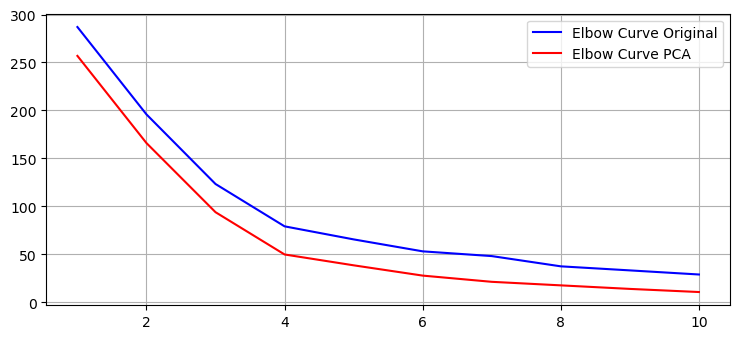

In [71]:
plt.plot(df_elbow1['k'], df_elbow1['inertia'], 'b-', label='Elbow Curve Original')
plt.plot(df_elbow2['k'], df_elbow2['inertia'], 'r-', label='Elbow Curve PCA')
plt.legend()
plt.grid()
plt.show()

In [72]:
# Composite plot to contrast the clusters
(sc1 + sc2).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [prediction]
      :Scatter   [p_24h]   (p_07d,coin_id,prediction)
   .NdOverlay.II :NdOverlay   [prediction]
      :Scatter   [PCA1]   (PCA2,coin_id,prediction)

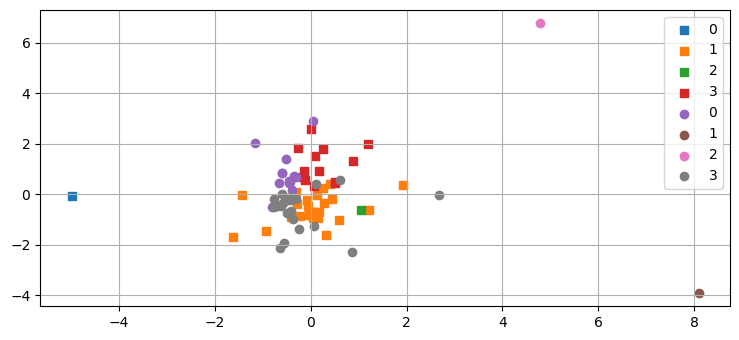

In [73]:
groupsReg=df_market_predictions.groupby('prediction')
for claster, pr in groupsReg:
    plt.scatter(pr.p_24h, pr.p_07d, marker ='s', label=claster)

groupsPCA=pca_predictions.groupby('prediction')
for claster, pr in groupsPCA:
    plt.scatter(pr.PCA1, pr.PCA2, marker ='o', label=claster)
#plt.scatter(df_market_predictions['p_24h'], df_market_predictions['p_07d'], label='Elbow Curve Original')
plt.legend()
plt.grid()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The PCA analysis help us to find which features create highest variability in the percent of cryptocurrency change, so using less features we create more accurate results in clastering the data. 